In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
#print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [5]:
countData = str(len(boston['data']))
countTarget = str(len(boston['target']))
print(f"data cuenta con: {countData}, target cuenta con: {countTarget}. Tienen la misma cantidad.")

data cuenta con: 506, target cuenta con: 506. Tienen la misma cantidad.


In [6]:
countColumns = str(len(boston['feature_names']))
print(f"El dataset cuenta con {countColumns} features")

El dataset cuenta con 13 features


In [7]:
# separa en datos de train y test
# con un 80% para train y 20% para test
# utiliza semilla 73
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=73)

In [8]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

1. El conjunto de datos fue generado por una universidad privada de pittsburg, Pensilvania. El mismo cuenta con 506 muestras. El mismo no cuenta con valores nulos.
2. La variable objetivo a predecir es el precio promedio de las casas en boston utilizando otros atributos, es la variable MEDV. Esta es una variable numerica por ende puede ser tratado como un problema de regresion para su resolucion. Dicha variable cobra relevancia en problemas de economia.
3. Los atributos que hay disponibles para hacer la prediccion son:
        - CRIM     Tasa de criminalidad per capita por ciudad
        - ZN       Proporcion de terreno residencial dividido en zonas para lotes de mas de 25 mil pies cuadrados (2300 metros cuadrados) 
        - INDUS    proporción de acres comerciales no minoristas por ciudad (acres = medida de superficie)
        - CHAS     Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - NOX      concentración de óxidos nítricos (partes por 10 millones)
        - RM       número medio de habitaciones por vivienda
        - AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
        - DIS      distancias ponderadas a cinco centros de empleo de Boston
        - RAD      índice de accesibilidad a carreteras radiales
        - TAX      Tasa de impuesto a la propiedad de valor total por  10,000
        - PTRATIO  Proporción alumno-maestro por ciudad
        - B        1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT    % menor estado de la población (porcentaje de personas con menos recursos)
4. Se podria imaginar que los atributos  ZN, TAX y RM serian las variables mas preponderantes a la hora de predecir el valor de la vivienda.
5. Se ve que hay variables que generan un sesgo que en su epoca eran tomadas en cuenta pero que hoy no deberia serlo como el numero de hombres con piel morena. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

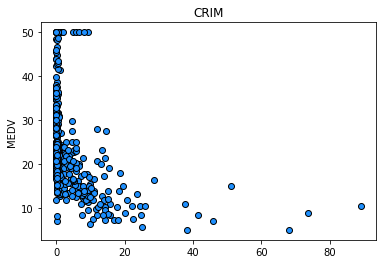

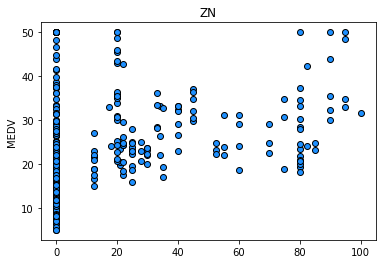

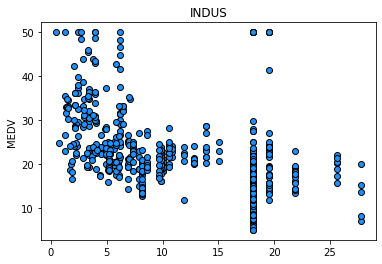

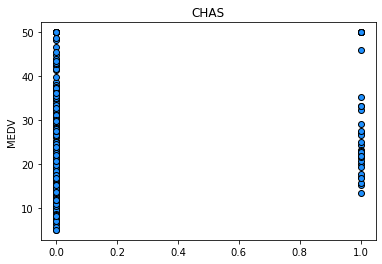

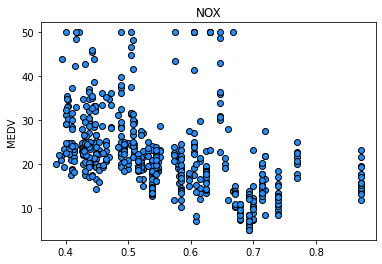

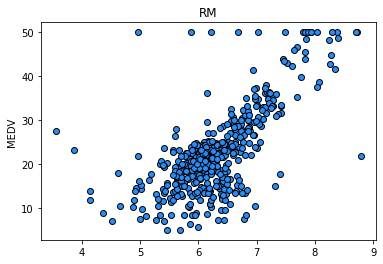

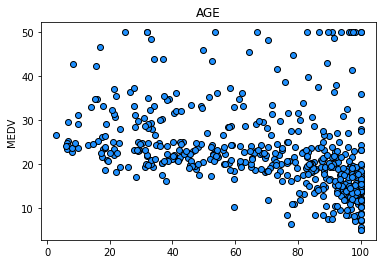

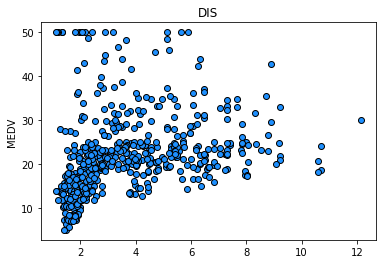

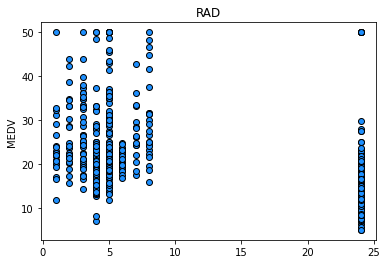

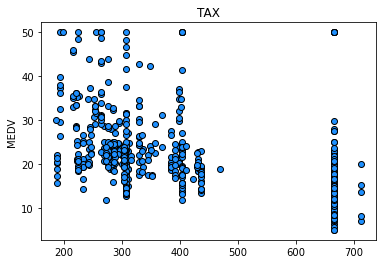

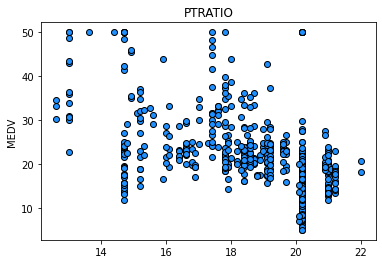

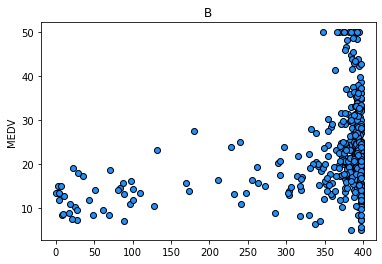

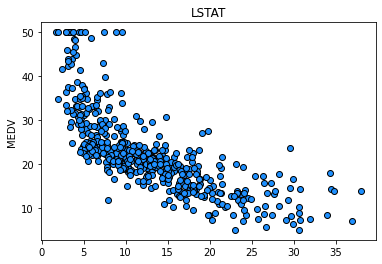

In [9]:
for i in boston['feature_names']:
    feature = (boston['feature_names'] == i)
    plt.scatter(X[:, feature], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(i)
    plt.ylabel('MEDV')
    plt.show()

Se puede observar que algunas variables son mas representativas que otras, esto se puede visualizar a través de los gráficos donde los datos muestran una relacion lineal entre el target y la variable, son las que mejor van a ayudar a predecir el target. 

Entre ellas podemos destacar en orden de mayor importancia:

1. LSTAT 
2. RM
3. DIS
4. NOX
5. INDUS
6. PRATIO
7. TAX
8. AGE
9. ZN
10. B
11. CRIM
12. RAD
13. CHAS

In [10]:
df=pd.DataFrame(boston['data'], columns=boston['feature_names'])
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

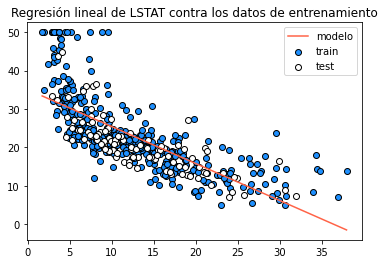

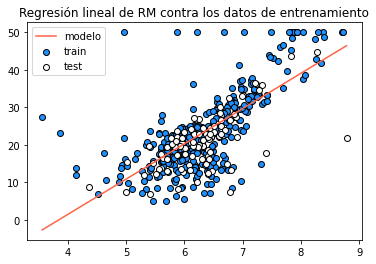

In [13]:
selector = (boston['feature_names'] == 'LSTAT')
X_train_LSTAT = X_train[:, selector]
X_test_LSTAT = X_test[:, selector]
lr = LinearRegression()
lr.fit(X_train_LSTAT, y_train)
x_start = min(np.min(X_train_LSTAT), np.min(X_test_LSTAT))
x_end = max(np.max(X_train_LSTAT), np.max(X_test_LSTAT))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, lr.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_LSTAT, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_LSTAT, y_test, facecolor="white", edgecolor="k", label="test")
plt.title('Regresión lineal de LSTAT contra los datos de entrenamiento')
plt.legend()
plt.show()

selector = (boston['feature_names'] == 'RM')
X_train_RM = X_train[:, selector]
X_test_RM = X_test[:, selector]
lr = LinearRegression()
lr.fit(X_train_RM, y_train)
x_start = min(np.min(X_train_RM), np.min(X_test_RM))
x_end = max(np.max(X_train_RM), np.max(X_test_RM))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, lr.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_RM, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_RM, y_test, facecolor="white", edgecolor="k", label="test")
plt.title('Regresión lineal de RM contra los datos de entrenamiento')
plt.legend()
plt.show()

In [16]:
print(f"Error cuadrático medio\n")
y_train_LSTAT_pred = lr.predict(X_train_LSTAT)
y_test_LSTAT_pred = lr.predict(X_test_LSTAT)
train_error_LSTAT = mean_squared_error(y_train, y_train_LSTAT_pred)
test_error_LSTAT = mean_squared_error(y_test, y_test_LSTAT_pred)
print(f'Train error LSTAT: {train_error_LSTAT.round(2)}')
print(f'Test error LSTAT: {test_error_LSTAT.round(2)}')
y_train_RM_pred = lr.predict(X_train_RM)
y_test_RM_pred = lr.predict(X_test_RM)
train_error_RM = mean_squared_error(y_train, y_train_RM_pred)
test_error_RM = mean_squared_error(y_test, y_test_RM_pred)
print(f'Train error RM: {train_error_LSTAT.round(2)}')
print(f'Test error RM: {test_error_LSTAT.round(2)}')

Error cuadrático medio

Train error LSTAT: 9240.28
Test error LSTAT: 8713.25
Train error RM: 9240.28
Test error RM: 8713.25


Se puede observar que el error cuadrático medio de la regresión lineal utilizando un solo feature, aplicado en las variables STAT y RM es igual.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

Análisis grado de polinomio

Grado polinomio: 0 - train_error 92.04
Grado polinomio: 0 - test_error  55.21
Grado polinomio: 1 - train_error 42.55
Grado polinomio: 1 - test_error  22.99
Grado polinomio: 2 - train_error 33.14
Grado polinomio: 2 - test_error  19.54
Grado polinomio: 3 - train_error 31.57
Grado polinomio: 3 - test_error  18.49
Grado polinomio: 4 - train_error 30.17
Grado polinomio: 4 - test_error  17.59
Grado polinomio: 5 - train_error 29.21
Grado polinomio: 5 - test_error  17.78
Grado polinomio: 6 - train_error 29.08
Grado polinomio: 6 - test_error  17.91
Grado polinomio: 7 - train_error 29.04
Grado polinomio: 7 - test_error  18.05
Grado polinomio: 8 - train_error 28.75
Grado polinomio: 8 - test_error  19.05
Grado polinomio: 9 - train_error 28.52
Grado polinomio: 9 - test_error  19.31
Grado polinomio: 10 - train_error 28.69
Grado polinomio: 10 - test_error  19.04
Grado polinomio: 11 - train_error 30.54
Grado polinomio: 11 - test_error  20.52
Grado polinomio: 12 - train_err

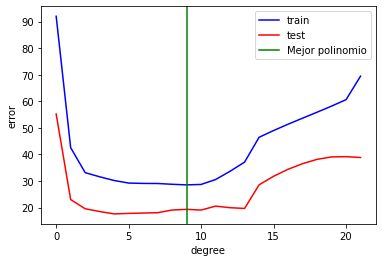

In [29]:
print(f"Análisis grado de polinomio\n")
list_train_error=[]
list_test_error=[]
rango = range(22)
best_pol = 0

for i in rango:
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression()  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_LSTAT, y_train)
    y_train_pred = model.predict(X_train_LSTAT)
    y_test_pred = model.predict(X_test_LSTAT)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f'Grado polinomio: {i} - train_error {train_error.round(2)}')
    print(f'Grado polinomio: {i} - test_error  {test_error.round(2)}')
    list_train_error.append(train_error)
    list_test_error.append(test_error)
    
plt.plot(rango, list_train_error, color="blue", label="train")
plt.plot(rango, list_test_error, color="red", label="test")
plt.axvline(x = 9, color = 'g', label = 'Mejor polinomio')
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver como el overfitting comienza luego del grado del polinomio 9. Sin embargo se cree que el mejor modelo es el del grado 2 de polinomio ya que luego el error disminuye muy lentamente, por lo cual no tiene sentido seguir aumentando el grado, y asi tambien se tiene una complejidad menor del polinomio. Sin embargo se muestra que el polinomio con el menor error en test es el de grado 9.

En términos computacionales sería mejor el polinomio de grado 2 pero con esta cantidad de datos consideramos que es mejor elegir el polinomio de grado 9 por mejores resultados en el test.

Grado polinomio: 2 - test_error  19.54 VS Grado polinomio: 9 - test_error  19.31

In [31]:
print(f"Diferencia entre posibles grado de polinomio a elegir\n")
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression()  # el bias ya esta como feature
model_LRP2 = make_pipeline(pf, lr)
model_LRP2.fit(X_train_LSTAT, y_train)
y_train_pred = model_LRP2.predict(X_train_LSTAT)
y_test_pred = model_LRP2.predict(X_test_LSTAT)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Grado del polinomio {degree}')
print(f'train_error {train_error.round(2)}')
print(f'test_error {test_error.round(2)}\n')

degree = 9
pf = PolynomialFeatures(degree)
lr = LinearRegression()  # el bias ya esta como feature
model_LRP9 = make_pipeline(pf, lr)
model_LRP9.fit(X_train_LSTAT, y_train)
y_train_pred = model_LRP9.predict(X_train_LSTAT)
y_test_pred = model_LRP9.predict(X_test_LSTAT)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Grado del polinomio {degree}')
print(f'train_error {train_error.round(2)}')
print(f'test_error {test_error.round(2)}')

Diferencia entre posibles grado de polinomio a elegir

Grado del polinomio 2
train_error 33.14
test_error 19.54

Grado del polinomio 9
train_error 28.52
test_error 19.31


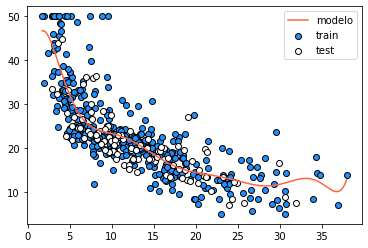

In [32]:
x_start = min(np.min(X_train_LSTAT), np.min(X_test_LSTAT))
x_end = max(np.max(X_train_LSTAT), np.max(X_test_LSTAT))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, model_LRP9.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_LSTAT, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_LSTAT, y_test, facecolor="white", edgecolor="k", label="test")
plt.title("")
plt.legend()
plt.show()

### Conclusión

Con el grado de polinomio 9 observamos mayores variaciones en la curva para poder predecir mejor a los datos de test que con otro grado de polinomio.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [33]:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'DIS')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
# Graficar error de overfittin train test

In [34]:
for i in range(1,10):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression()  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)

Train error:  31.92 grado del polinomio  1
Test error:  22.77 grado del polinomio  1
Train error:  16.64 grado del polinomio  2
Test error:  19.21 grado del polinomio  2
Train error:  14.39 grado del polinomio  3
Test error:  20.54 grado del polinomio  3
Train error:  12.71 grado del polinomio  4
Test error:  20.98 grado del polinomio  4
Train error:  11.49 grado del polinomio  5
Test error:  24.86 grado del polinomio  5
Train error:  9.54 grado del polinomio  6
Test error:  32.15 grado del polinomio  6
Train error:  7.62 grado del polinomio  7
Test error:  476.69 grado del polinomio  7
Train error:  7.02 grado del polinomio  8
Test error:  14027.49 grado del polinomio  8
Train error:  5.37 grado del polinomio  9
Test error:  1366435.25 grado del polinomio  9


se obtuvieron mejores modelos ya que los errores son menores y el grado que mejor se adapta es el grado 2, habiendo overfitting si se aumenta el mismo.

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [ ]:
boston['feature_names']

In [ ]:
selector = ((boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN') 
| (boston['feature_names'] == 'INDUS')| (boston['feature_names'] == 'CHAS') | (boston['feature_names'] == 'NOX') 
| (boston['feature_names'] == 'RM')|(boston['feature_names'] == 'AGE') | (boston['feature_names'] == 'DIS') 
| (boston['feature_names'] == 'RAD')| (boston['feature_names'] == 'TAX') | (boston['feature_names'] == 'PTRATIO')
| (boston['feature_names'] == 'B') | (boston['feature_names'] == 'LSTAT'))
X_train_fs2 = X_train[:, selector]
X_test_fs2 = X_test[:, selector]
X_train_fs2.shape, X_test_fs2.shape

In [ ]:
for i in range(1,5):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=True)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs2,y_train)
    y_train_pred = model.predict(X_train_fs2)
    y_test_pred = model.predict(X_test_fs2)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)

Se observa que el error de test es el del polinomio de grado 2, a partir de este comienza el overfitting.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [ ]:
model

In [ ]:
Input=[('polinomial_features',PolynomialFeatures(2)),('ridge',Ridge(alpha=0.1),('linear_reg', LinearRegression()))]
pipe = Pipeline(Input)

In [ ]:
for i in range(1,5):
    degree = i
    pf = PolynomialFeatures(degree)
    lr = LinearRegression()  # el bias ya esta como feature
    clf= Ridge(alpha=1.5)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs2,y_train)
    clf.fit(X_train_fs2,y_train)
    y_train_pred = model.predict(X_train_fs2)
    y_train_pred = clf.predict(X_train_fs2)
    y_test_pred = model.predict(X_test_fs2)
    y_test_pred = clf.predict(X_test_fs2)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'grado del polinomio ', i)
    print('Test error: ', test_error_conj.round(2), 'grado del polinomio ', i)

In [ ]:
X_train_fs2

In [ ]:
for i in np.arange(1,150,5):
    pf = PolynomialFeatures(2)
    #lr = LinearRegression()  # el bias ya esta como feature
    clf= Ridge(alpha=i)
    #model = make_pipeline(pf, clf)
    model = make_pipeline(pf, clf)
    model.fit(X_train_fs2,y_train)
    y_train_pred = model.predict(X_train_fs2)
    y_test_pred = model.predict(X_test_fs2)
    train_error_conj = mean_squared_error(y_train, y_train_pred)
    test_error_conj = mean_squared_error(y_test, y_test_pred)
    print('Train error: ' , train_error_conj.round(2), 'Alpha: ', i)
    print('Test error: ', test_error_conj.round(2), 'Alpha: ', i)

In [ ]:
pf = PolynomialFeatures(2)
clf= Ridge(alpha=50)
model = make_pipeline(pf, clf)
model.fit(X_train_fs2,y_train)
y_train_pred = model.predict(X_train_fs2)
y_test_pred = model.predict(X_test_fs2)
train_error_conj = mean_squared_error(y_train, y_train_pred)
test_error_conj = mean_squared_error(y_test, y_test_pred)
print('Train error: ' , train_error_conj.round(2), 'Alpha: ', i)
print('Test error: ', test_error_conj.round(2), 'Alpha: ', i)

Podemos observar con este valor del alpha de Ridge el error de test baja a 22.55